![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [2]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt


## 1. Data Exploration and Cleaning

In [3]:
df = pd.read_csv('/Users/rutujajadhav/Desktop/Log Reg Practice Insurance claim/Data/car_insurance (1).csv')
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.shape

(10000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [6]:
df.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


### Missing Values 

Two cols - credit_score and annual_mileage have missing values.
Check what their distribution looks like

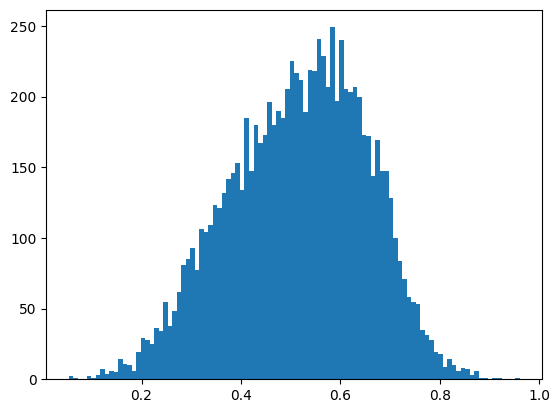

In [7]:
plt.hist(df['credit_score'], bins=100)
plt.show()

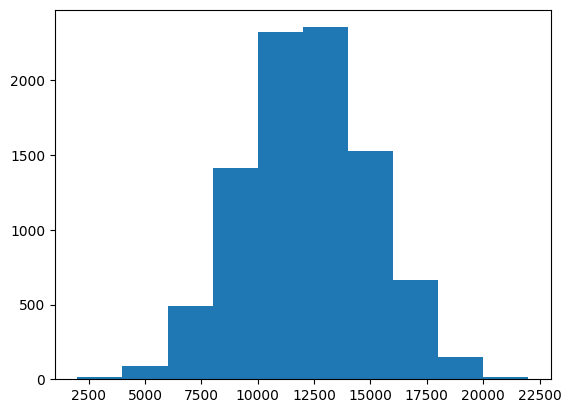

In [8]:
plt.hist(df['annual_mileage'], bins=10)
plt.show()

The cols with missing values appear to be normally distributed. So we can replace missing vals with the mean. (If it was not normal, we could double check with a box plot and replace with Median). If the columns has categorical data, we would replace with Mode.

In [ ]:
df['credit_score'].fillna(df['credit_score'].mean(), inplace = True)
df['annual_mileage'].fillna(df['annual_mileage'].mean(), inplace = True)

## 2. Model Prep and Build

Approach: Since the problem statement specifies that the company has just enough budget to create a model based on one feature only, we can create a model for every feature and report the best performing model.

1. First, I separated the titles of all feature columns.
2. Then I passed these titles individually in a for loop to create a model for each feature using the logit algorithm.
3. Each model object created was appended to a list of all models.


In [10]:
#Titles of feature cols. All cols except for ID and Outcome. .columns returns an index object containing the titles of all X variable columns.
features = df.drop(columns = ['id','outcome']).columns


    
    

In [11]:
#Empty list to store model objects which will be created for each explanatory variable
models = []

#Loop to pull each column name. Use each column one at a time, as the X variable to fit Y values on a log reg curve.

for col in features:
    
    #create model for each feature. Used an f-string to pass a variable inside a string through the use of curly brackets {}. For example, to print the name of the iterator feature in a for loop-> for col in features: print(f"{col}"")
    model = logit(f"outcome~{col}", data = df).fit() 
    
    #append each model to the list of models
    models.append(model) 

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

## 3. Qunatifying the model fit for the model of each feature

Recall Vs Precision - Opted for Recall instead of Precision. As an insuarance provider it would make sense for the company to focus on reducing type II error, ie, reducing False Negatives. When we aim to reduce false negatives, we shoul focus on higher Recall. It is imp that the company is able to reduce number of false negatives because, you'd rather have the model tell us someone is going to make a claim but doesn't actually claim than have the model tell us that someone is NOT going to make a claim but actually files for a claim. In the later case, the company is likely to loose more money than it would expect to. Recall helps us increase the number of True Positives wrt Actual Positives (Positive = Made a claim)

In [12]:
accuracy_of_mods = []
recall_of_mods = [] 

#loop through the models to create a confusion matrix for each

# used enumerate instead of range() so that we can directly access the model object 'mod' instead of acccessing it via index ie mod[i]

for mod_index, mod in enumerate(models): 
    conf_mat = mod.pred_table()
    
    #Calculating True negative, true positive, false negative, false positive
    TN = conf_mat[0,0]
    TP = conf_mat[1,1]
    FN = conf_mat[1,0]
    FP = conf_mat[0,1]
    
    mod_accuracy = (TN+TP)/(TN+TP+FN+FP)
    mod_recall = TP/ (TP+FN)
    
    accuracy_of_mods.append(mod_accuracy)
    recall_of_mods.append(mod_recall)
    

Creating a df of all features and corresponding metrics

In [ ]:
features_and_metrics = pd.DataFrame({'Feature':features, 'Accuracy':accuracy_of_mods, 'Recall':recall_of_mods})
print(features_and_metrics)

In [14]:
features_and_metrics.sort_values(by='Recall', ascending=False)

,Feature,Accuracy,Recall
2,driving_experience,0.7771,0.707628
6,vehicle_ownership,0.7351,0.560804
0,age,0.7747,0.462177
4,income,0.7425,0.378551
5,credit_score,0.7054,0.233961
11,annual_mileage,0.6904,0.032876
1,gender,0.6867,0.000000
3,education,0.6867,0.000000
7,vehicle_year,0.6867,0.000000
8,married,0.6867,0.000000


## 4. Conclusion

Based on the above, if the insuarance company had enough resources to predict the outcome of future applications using just ONE feature, they should go for Driving_experience based on the recall. Experience is also the feature with the highest accuracy.

Notes:
to pull the best features wihtout creating a df, use this:

Find the feature with the highest accuracy
best_feature = features[accuracy_of_mods.index(max(accuracies))]

Create best_feature_df
best_feature_df = pd.DataFrame({"best_feature": best_feature,
                                "best_accuracy": max(accuracy_of_mods)},
                                index=[0])
best_feature_df